<a href="https://colab.research.google.com/github/bonima21/Insectoscope/blob/Insectoscope_secure/Insectoscope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#https://learnopencv.com/pytorch-for-beginners-image-classification-using-pre-trained-models/

from __future__ import print_function, division

import torch
import torch.nn as nn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import pickle
from PIL import Image
import datetime

plt.ion()   # interactive mode

In [7]:
from google.colab import files


# https://drive.google.com/file/d/1qKiyp4r8SqUtz2ZWk3E6oZhyhl6t8lyG/view?usp=sharing
!gdown --id 1qKiyp4r8SqUtz2ZWk3E6oZhyhl6t8lyG
path_class_names = "/content/class_names_restnet_leeds_butterfly.pkl"


# https://drive.google.com/file/d/1Ep2YWU4M-yVkF7AFP3aD1sVhuriIDzFe/view?usp=sharing
!gdown --id 1Ep2YWU4M-yVkF7AFP3aD1sVhuriIDzFe
path_model = "/content/model_state_restnet_leeds_butterfly.pth"


/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1qKiyp4r8SqUtz2ZWk3E6oZhyhl6t8lyG
To: /content/class_names_restnet_leeds_butterfly.pkl
100% 247/247 [00:00<00:00, 918kB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1Ep2YWU4M-yVkF7AFP3aD1sVhuriIDzFe
From (redirected): https://drive.google.com/uc?id=1Ep2YWU4M-yVkF7AFP3aD1sVhuriIDzFe&confirm=t&uuid=e3fac4b6-a94c-4b5a-bb3f-80232d57f158
To: /content/model_state_restnet_leeds_butterfly.pth
100% 44.8M/44.8M [00:00<00:00, 113MB/s]


In [20]:
import torch
from torchvision import transforms
from PIL import Image
from google.colab import files

# Uncomment the code for uploading the input image
print("Please upload an image of one of these butterflies: Small White, Large White, Small Tortoiseshell, Peacock, Red Admiral, Painted Lady, Comma, Speckled Wood, Meadow Brown, Gatekeeper")
upload_input = files.upload()
path_input = "/content/{}".format(list(upload_input.keys())[0])

# Load the uploaded image
img = Image.open(path_input)

# Define the transformations
data_transforms_val = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

img_t = data_transforms_val(img)
batch_t = torch.unsqueeze(img_t, 0)
model_ft.eval()

# Perform inference as before...


Please upload an image of one of these butterflies: Small White, Large White, Small Tortoiseshell, Peacock, Red Admiral, Painted Lady, Comma, Speckled Wood, Meadow Brown, Gatekeeper


Saving painted lady adult_0029_GYE_2005_RKD_Peterson.webp to painted lady adult_0029_GYE_2005_RKD_Peterson.webp


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [21]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms_val = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

In [22]:
class_names = pickle.load(open(path_class_names, "rb"))
print(class_names)

['001_Danaus Plexippus', '002_Heliconius Charitonius', '003_Heliconius Erato', '004_Junonia Coenia', '005_Lycaena Phlaeas', '006_Nymphalis Antiopa', '007_Papilio Cresphontes', '008_Pieris Rapae', '009_Vanessa Atalanta', '010_Vanessa Cardui']


In [23]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [25]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, len(class_names))

model_ft = model_ft.to(device)

In [26]:
model_ft.load_state_dict(copy.deepcopy(torch.load(path_model,device)))

<All keys matched successfully>

In [27]:
img = Image.open(path_input)
img_t = data_transforms_val(img)
batch_t = torch.unsqueeze(img_t, 0)
model_ft.eval()
# We don't need gradients for test, so wrap in
# no_grad to save memory
with torch.no_grad():
    batch_t = batch_t.to(device)
    # forward propagation
    output = model_ft( batch_t)
    # get prediction
    probs = torch.nn.functional.softmax(output, dim=1)
    conf, output = torch.max(probs, 1)
    # output = torch.argmax(output, 1)

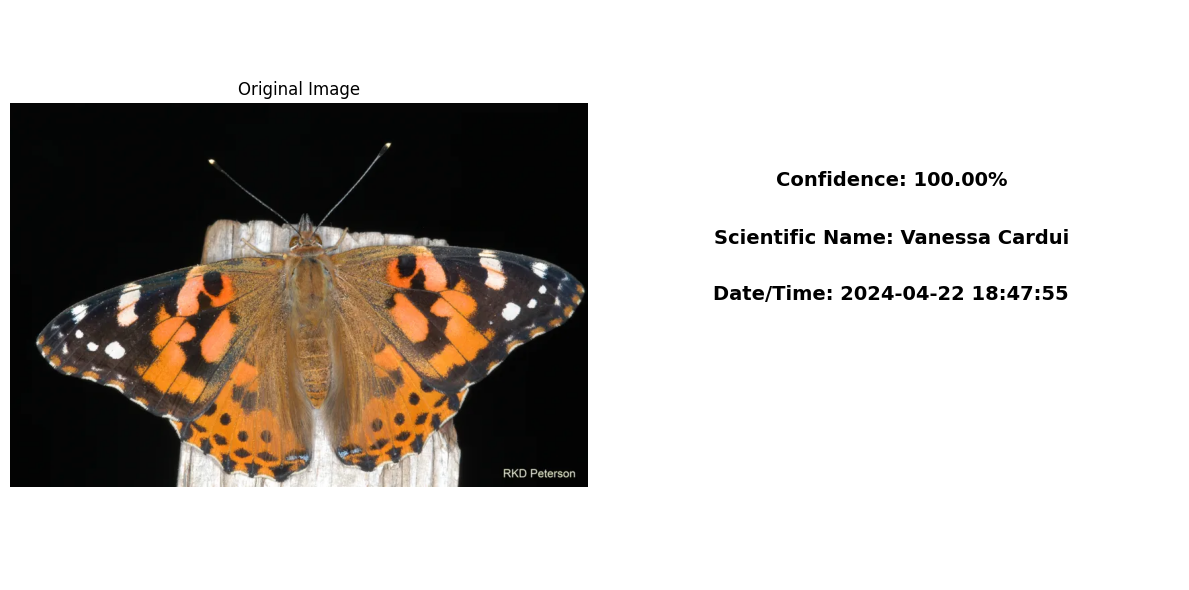

In [46]:
# Import necessary libraries
import datetime
import PIL
import matplotlib.pyplot as plt
from IPython.display import HTML, display

# Get the current date and time
now = datetime.datetime.now()
date_time = now.strftime("%Y-%m-%d %H:%M:%S")

# Get the scientific name of the butterfly from the class names list
scientific_name = class_names[output.item()]

# Remove numeric prefixes from scientific names
scientific_name_cleaned = scientific_name.split("_", 1)[-1]

# Get the confidence rating
confidence = conf.item() * 100

# Load the original image
img = PIL.Image.open(path_input)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Display the original image in the first subplot
ax1.imshow(img)
ax1.set_title("Original Image")
ax1.axis('off')

# Display the prediction information in the second subplot
ax2.text(0.5, 0.5, f"Date/Time: {date_time}", ha="center", va="center", fontsize=14, fontweight='bold')
ax2.text(0.5, 0.6, f"Scientific Name: {scientific_name_cleaned}", ha="center", va="center", fontsize=14, fontweight='bold')
ax2.text(0.5, 0.7, f"Confidence: {confidence:.2f}%", ha="center", va="center", fontsize=14, fontweight='bold')
ax2.axis('off')

# Adjust layout
plt.tight_layout()

# Display the figure
plt.show()
